In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import skimage.io
import skimage.feature
import skimage.transform

import os
from glob import glob
import re

%matplotlib inline

In [2]:
# read the folders in a list
folder = os.listdir('data')
print(folder)

['MonkeyHead', 'Natural', 'BearHead', 'CatHead', 'MouseHead', 'WolfHead', 'HumanHead', 'PigeonHead', 'CowHead', 'SheepHead', 'ChickenHead', 'TigerHead', 'EagleHead', 'PandaHead', 'RabbitHead', 'DogHead', 'DuckHead', 'LionHead', 'ElephantHead', 'DeerHead']


In [3]:
glob('./data/{}/*.jpg'.format('BearHead'))

['./data/BearHead/bearfrontal0009.jpg',
 './data/BearHead/bearfrontal0035.jpg',
 './data/BearHead/bearfrontal0021.jpg',
 './data/BearHead/bearfrontal0020.jpg',
 './data/BearHead/bearfrontal0034.jpg',
 './data/BearHead/bearfrontal0008.jpg',
 './data/BearHead/polar-bear-tongue.jpg',
 './data/BearHead/bearfrontal0022.jpg',
 './data/BearHead/bearfrontal0036.jpg',
 './data/BearHead/bearfrontal0037.jpg',
 './data/BearHead/bearfrontal0023.jpg',
 './data/BearHead/bearfrontal0027.jpg',
 './data/BearHead/bearfrontal0033.jpg',
 './data/BearHead/bearfrontal0032.jpg',
 './data/BearHead/bearfrontal0026.jpg',
 './data/BearHead/bearfrontal0030.jpg',
 './data/BearHead/bearfrontal0024.jpg',
 './data/BearHead/bearfrontal0018.jpg',
 './data/BearHead/bearfrontal0019.jpg',
 './data/BearHead/bearfrontal0025.jpg',
 './data/BearHead/bearfrontal0031.jpg',
 './data/BearHead/bearfrontal0095.jpg',
 './data/BearHead/bearfrontal0081.jpg',
 './data/BearHead/bearfrontal0056.jpg',
 './data/BearHead/bearfrontal0042.jpg'

In [4]:
all_path =[]
for f in folder:
    all_path += glob('./data/{}/*.jpg'.format(f))

In [5]:
all_path

['./data/MonkeyHead/monkeyfrontal0088.jpg',
 './data/MonkeyHead/monkeyfrontal0063.jpg',
 './data/MonkeyHead/monkeyfrontal0077.jpg',
 './data/MonkeyHead/monkeyfrontal0076.jpg',
 './data/MonkeyHead/monkeyfrontal0062.jpg',
 './data/MonkeyHead/monkeyfrontal0089.jpg',
 './data/MonkeyHead/monkeyfrontal0100.jpg',
 './data/MonkeyHead/monkeyfrontal0048.jpg',
 './data/MonkeyHead/monkeyfrontal0074.jpg',
 './data/MonkeyHead/monkeyfrontal0060.jpg',
 './data/MonkeyHead/monkeyfrontal0061.jpg',
 './data/MonkeyHead/monkeyfrontal0075.jpg',
 './data/MonkeyHead/monkeyfrontal0049.jpg',
 './data/MonkeyHead/monkeyfrontal0071.jpg',
 './data/MonkeyHead/monkeyfrontal0065.jpg',
 './data/MonkeyHead/monkeyfrontal0059.jpg',
 './data/MonkeyHead/monkeyfrontal0058.jpg',
 './data/MonkeyHead/monkeyfrontal0064.jpg',
 './data/MonkeyHead/monkeyfrontal0070.jpg',
 './data/MonkeyHead/monkeyfrontal0099.jpg',
 './data/MonkeyHead/monkeyfrontal0066.jpg',
 './data/MonkeyHead/monkeyfrontal0072.jpg',
 './data/MonkeyHead/monkeyfronta

In [6]:
# read all image and label
img_all = skimage.io.ImageCollection(all_path)

In [7]:
len(img_all)

2023

In [8]:
img_all.files

['./data/BearHead/bearfrontal0001.jpg',
 './data/BearHead/bearfrontal0002.jpg',
 './data/BearHead/bearfrontal0003.jpg',
 './data/BearHead/bearfrontal0004.jpg',
 './data/BearHead/bearfrontal0005.jpg',
 './data/BearHead/bearfrontal0006.jpg',
 './data/BearHead/bearfrontal0007.jpg',
 './data/BearHead/bearfrontal0008.jpg',
 './data/BearHead/bearfrontal0009.jpg',
 './data/BearHead/bearfrontal0010.jpg',
 './data/BearHead/bearfrontal0011.jpg',
 './data/BearHead/bearfrontal0012.jpg',
 './data/BearHead/bearfrontal0013.jpg',
 './data/BearHead/bearfrontal0014.jpg',
 './data/BearHead/bearfrontal0015.jpg',
 './data/BearHead/bearfrontal0016.jpg',
 './data/BearHead/bearfrontal0017.jpg',
 './data/BearHead/bearfrontal0018.jpg',
 './data/BearHead/bearfrontal0019.jpg',
 './data/BearHead/bearfrontal0020.jpg',
 './data/BearHead/bearfrontal0021.jpg',
 './data/BearHead/bearfrontal0022.jpg',
 './data/BearHead/bearfrontal0023.jpg',
 './data/BearHead/bearfrontal0024.jpg',
 './data/BearHead/bearfrontal0025.jpg',


In [9]:
# labeling
# extract text folder
def extract_label(text):
    print(text)
    try:
        label = re.search(r'./data/(.*?)Head/',text).group(1)
    except:
        label = re.search(r'./data/(.*?)/',text).group(1)
        
    return label.lower()


In [10]:
labels = list(map(extract_label,img_all.files))

./data/BearHead/bearfrontal0001.jpg
./data/BearHead/bearfrontal0002.jpg
./data/BearHead/bearfrontal0003.jpg
./data/BearHead/bearfrontal0004.jpg
./data/BearHead/bearfrontal0005.jpg
./data/BearHead/bearfrontal0006.jpg
./data/BearHead/bearfrontal0007.jpg
./data/BearHead/bearfrontal0008.jpg
./data/BearHead/bearfrontal0009.jpg
./data/BearHead/bearfrontal0010.jpg
./data/BearHead/bearfrontal0011.jpg
./data/BearHead/bearfrontal0012.jpg
./data/BearHead/bearfrontal0013.jpg
./data/BearHead/bearfrontal0014.jpg
./data/BearHead/bearfrontal0015.jpg
./data/BearHead/bearfrontal0016.jpg
./data/BearHead/bearfrontal0017.jpg
./data/BearHead/bearfrontal0018.jpg
./data/BearHead/bearfrontal0019.jpg
./data/BearHead/bearfrontal0020.jpg
./data/BearHead/bearfrontal0021.jpg
./data/BearHead/bearfrontal0022.jpg
./data/BearHead/bearfrontal0023.jpg
./data/BearHead/bearfrontal0024.jpg
./data/BearHead/bearfrontal0025.jpg
./data/BearHead/bearfrontal0026.jpg
./data/BearHead/bearfrontal0027.jpg
./data/BearHead/bearfrontal0

./data/TigerHead/tiger_running_in_snow.jpg
./data/TigerHead/volunteer-with-a-tiger.jpg
./data/WolfHead/wolffrontal0001.jpg
./data/WolfHead/wolffrontal0002.jpg
./data/WolfHead/wolffrontal0003.jpg
./data/WolfHead/wolffrontal0004.jpg
./data/WolfHead/wolffrontal0005.jpg
./data/WolfHead/wolffrontal0006.jpg
./data/WolfHead/wolffrontal0007.jpg
./data/WolfHead/wolffrontal0008.jpg
./data/WolfHead/wolffrontal0009.jpg
./data/WolfHead/wolffrontal0010.jpg
./data/WolfHead/wolffrontal0011.jpg
./data/WolfHead/wolffrontal0012.jpg
./data/WolfHead/wolffrontal0013.jpg
./data/WolfHead/wolffrontal0014.jpg
./data/WolfHead/wolffrontal0015.jpg
./data/WolfHead/wolffrontal0016.jpg
./data/WolfHead/wolffrontal0017.jpg
./data/WolfHead/wolffrontal0018.jpg
./data/WolfHead/wolffrontal0019.jpg
./data/WolfHead/wolffrontal0020.jpg
./data/WolfHead/wolffrontal0021.jpg
./data/WolfHead/wolffrontal0022.jpg
./data/WolfHead/wolffrontal0023.jpg
./data/WolfHead/wolffrontal0024.jpg
./data/WolfHead/wolffrontal0025.jpg
./data/WolfHe

In [11]:
len(labels)

2023

In [12]:
def buffer(io):
    return io

img_all_arrs = np.array(list(map(buffer,img_all)))
# img_all[2]

In [13]:
img_all_arrs.shape


(2023, 80, 80, 3)

In [14]:
data = dict()

data['description'] ='There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [15]:
# save the file in pickle
import pickle
import collections

In [16]:
pickle.dump(data,open('data_animals_head_20.pickle','wb'))

In [17]:
count_values = collections.Counter(data['target'])
count_values

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 101,
         'deer': 101,
         'dog': 132,
         'duck': 102,
         'eagle': 96,
         'elephant': 100,
         'human': 100,
         'lion': 97,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 116,
         'pigeon': 98,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 112,
         'wolf': 100})

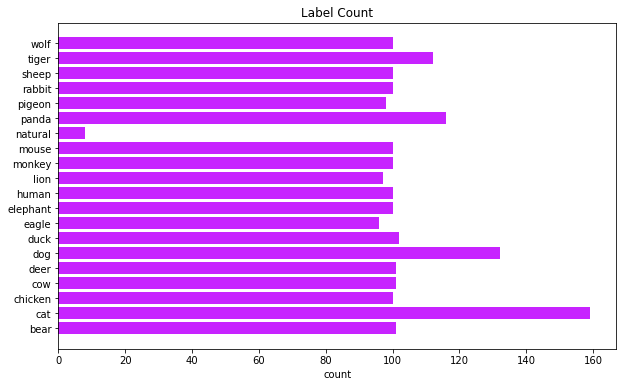

In [18]:
y_axis = list(count_values.keys())
values = count_values.values()
plt.figure(figsize=(10,6))
plt.barh(y_axis,values,color='#C723FF')
plt.xlabel('count')
plt.title('Label Count')
plt.show()

In [19]:
data['data'].shape

(2023, 80, 80, 3)

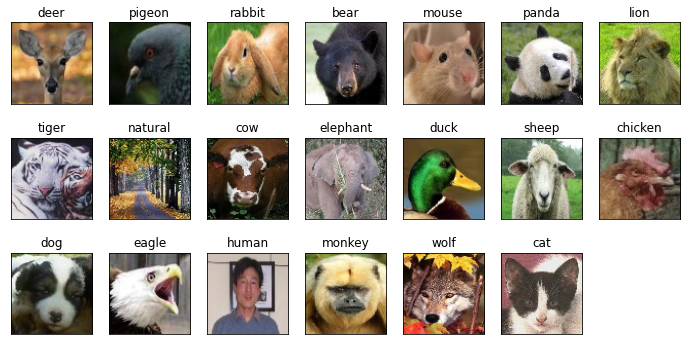

In [20]:
plt.figure(figsize=(12,6))
for i,c in enumerate(data['labels']):
    index = data['target'].index(c)
    img = data['data'][index]

    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(c)

plt.show()
